# Importing Libraries

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB, MultinomialNB

from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, mean_squared_error



import os
print(os.listdir("./dataset/"))
import warnings
warnings.filterwarnings('ignore')

['aclImdb', 'aclImdb_v1.tar.gz', 'cleaned_data.csv', 'IMDb_Reviews.csv']


# Importing Cleaned Data

In [2]:
#importing the training data
data=pd.read_csv('./dataset/cleaned_data.csv')
print(data.shape)
data.head(10)

(49582, 2)


,review,sentiment
0,teenager martha moxley maggie grace move high ...,1
1,ok really like kris kristofferson usual easy g...,0
2,spoiler read think watching movie although wou...,0
3,hi people seen wonderful movie im sure thet wo...,1
4,recently bought dvd forgetting much hated movi...,0
5,leave braik put good show finally zorak living...,1
6,nathan detroit frank sinatra manager new york ...,1
7,understand crash course right context must und...,1
8,impressed chavez stance globalisation sometime...,1
9,movie directed renny harlin finnish miracle st...,1


In [4]:
X = data['review']
y = data['sentiment']

## Vectorizing data

In [21]:
%%time
tfidf_vect = TfidfVectorizer(max_features=10000, ngram_range=(1,3)) #tfidfVectorizer
X_tfidf = tfidf_vect.fit_transform(X).toarray()

#count_vect = CountVectorizer() # CountVectorizer
#Xtrain_count = count_vect.fit_transform(X)

Wall time: 1min 32s


In [22]:
X_tfidf.shape

((49582, 10000), (49582, 91832))

## splitting into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39665, 10000) (39665,)
(9917, 10000) (9917,)


# Modeling

## Logistic Regression

Logistic Regression Accuracy : 89.08%
Logistic Regression RMSE : 0.1092064132298074
Wall time: 20 s


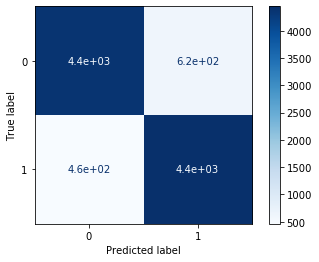

In [24]:
%%time
lr = LogisticRegression()
lr.fit(X_train,y_train)
p1=lr.predict(X_test)
s1=accuracy_score(y_test,p1)
rmse1 = mean_squared_error(y_test,p1)
print("Logistic Regression Accuracy :", "{:.2f}%".format(100*s1))
print("Logistic Regression RMSE :", "{}".format(rmse1))
plot_confusion_matrix(lr, X_test, y_test,cmap = 'Blues')
plt.grid(False)

## Multinomial Naive Bayes

Multinomial Naive Bayes Classifier Accuracy : 86.37%
Multinomial Naive Bayes Classifier RMSE : 0.13633155188060905
Wall time: 2.07 s


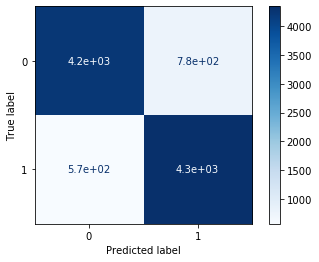

In [25]:
%%time
mnb= MultinomialNB()
mnb.fit(X_train,y_train)
p2=mnb.predict(X_test)
s2=accuracy_score(y_test,p2)
rmse2 = mean_squared_error(y_test,p2)
print("Multinomial Naive Bayes Classifier Accuracy :", "{:.2f}%".format(100*s2))
print("Multinomial Naive Bayes Classifier RMSE :", "{}".format(rmse2))
plot_confusion_matrix(mnb, X_test, y_test,cmap = 'Blues')
plt.grid(False)

## Linear SVM

Linear Support Vector Classifier Accuracy : 88.97%
Linear Support Vector Classifier RMSE : 0.11031561964303721
Wall time: 5.97 s


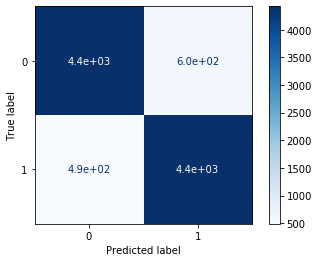

In [27]:
%%time
linear_svc = LinearSVC(penalty='l2',loss = 'hinge')
linear_svc.fit(X_train,y_train)
p3=linear_svc.predict(X_test)
s3=accuracy_score(y_test,p3)
rmse3 = mean_squared_error(y_test,p3)
print("Linear Support Vector Classifier Accuracy :", "{:.2f}%".format(100*s3))
print("Linear Support Vector Classifier RMSE :", "{}".format(rmse3))
plot_confusion_matrix(linear_svc, X_test, y_test,cmap = 'Blues')
plt.grid(False)

## XGboost Classifier

In [ ]:
%%time
xgbo = XGBClassifier()
xgbo.fit(X_train,y_train)
p4=xgbo.predict(X_test)
s4=accuracy_score(y_test,p4)
rmse4 = mean_squared_error(y_test,p4)
print("XGBoost Accuracy :", "{:.2f}%".format(100*s4))
print("XGBoost RMSE :", "{}".format(rmse4))
plot_confusion_matrix(xgbo, X_test, y_test, cmap = 'Blues')
plt.grid(False)

[22:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Random Forest Classifier

Random Forest Classifier Accuracy : 84.57%
Random Forest Classifier RMSE : 0.1542805283856005%
Wall time: 8min


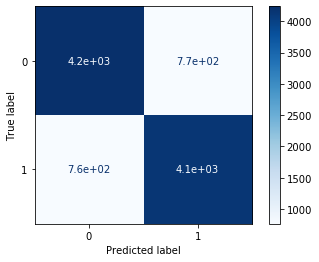

In [13]:
%%time
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
p5=rfc.predict(X_test)
s5=accuracy_score(y_test,p5)
rmse5 = mean_squared_error(y_test,p5)
print("Random Forest Classifier Accuracy :", "{:.2f}%".format(100*s5))
print("Random Forest Classifier RMSE :", "{}".format(rmse5))
plot_confusion_matrix(rfc, X_test, y_test, cmap = 'Blues')
plt.grid(False)

## Gradient Boosting Classifier

GradientBoostingClassifier Accuracy : 80.42%


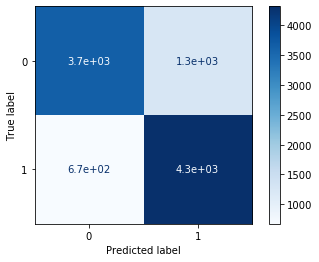

In [17]:
%%time
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
p6=gbc.predict(X_test)
s6=accuracy_score(y_test,p6)
rmse6 = mean_squared_error(y_test,p6)
print("GradientBoostingClassifier Accuracy :", "{:.2f}%".format(100*s6))
print("Gradient Boosting Classifier RMSE :", "{}%".format(rmse6))
plot_confusion_matrix(gbc, X_test, y_test, cmap = 'Blues')
plt.grid(False)

## Decision Tree Classifier

DecisionTreeClassifier Accuracy : 71.28%


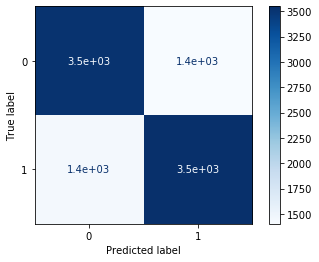

In [20]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
p7=dtc.predict(X_test)
s7=accuracy_score(y_test,p7)
rmse7 = mean_squared_error(y_test,p7)
print("Decision Tree Classifier Accuracy :", "{:.2f}%".format(100*s7))
print("Decision Tree Classifier RMSE :", "{}%".format(rmse7))

plot_confusion_matrix(dtc, X_test, y_test, cmap = 'Blues')
plt.grid(False)

In [ ]:
# Neural Network 

In [ ]:
# Creating Neural Network Model
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(5000,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mse'])


In [ ]:
hist = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=5)

In [23]:
models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Linear SVM', 'XGBoost Classifier','Random Forest Classifier'
         ,'Gradient Boosting Classifier','Decision Tree Classifier']
accuracies = [s1,s2,s3,s4,s5,s6,s7]
rmses = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7 ]
modeling_df = pd.DataFrame({'Models': models,
                'Accuracy': accuracies,
                'RMSE': rmses,
            })

In [26]:
modeling_df.sort_values('Accuracy', axis=0, ascending=False,inplace=False, kind='quicksort', na_position='last').style.highlight_max(axis=0)

,Models,Accuracy
2,Linear SVM,0.892306
0,Logistic Regression,0.889584
1,Multinomial Naive Bayes,0.860643
4,Random Forest Classifier,0.847333
3,XGBoost Classifier,0.846022
5,Gradient Boosting Classifier,0.804175
6,Decision Tree Classifier,0.712816


References :

* https://www.kaggle.com/derrelldsouza/imdb-sentiment-analysis-eda-ml-lstm-bert#4.-Predictive-Modelling-using-Machine-Learning
* https://github.com/ReiCHU31/Sentiment-analysis-of-IMDb-movie-reviews/blob/master/Sentiment%20analysis%20of%20IMDb%20movie%20reviews.ipynb

* Neural Net : https://www.kaggle.com/akashingoley/sentiment-analysis-with-acc-score-of-0-89#Creating-Different-Models
* https://www.kaggle.com/manishthem/sentiment-analysis-imdb-50k-dataset-91-accuracy

# TODO 

* Complete the analysis and do some hyper parameters tuning
* 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [35]:
X_train.shape

(39665,)

In [49]:
x_train_arr = Xtrain_tfidf.toarray()
x_test_arr = Xtest_tfidf.toarray()


In [50]:
x_train_arr.shape

(39665, 83484)

In [45]:
# Creating Neural Network Model
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(83484,)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                1335760   
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,336,049
Trainable params: 1,336,049
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mean_squared_error'])

In [ ]:
history = model.fit(x_train_arr, y_train, batch_size=256, validation_data=(x_test_arr, y_test), epochs=4)